# MERS

# Imports Section 

In [63]:
import altair as alt
import Bio.Phylo
import json
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns

from Helpers import linking_tree_with_plots_clickable, linking_tree_with_plots_brush, scatterplot_with_tooltip_interactive
from Helpers import get_y_positions

from augur.utils import numeric_date

%matplotlib inline

In [64]:
try: 
    snakemake.input.tree 
    import selenium
    from selenium.webdriver import Chrome 
    from selenium import webdriver

    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    chrome_options.add_argument("--remote-debugging-port=9222")

    browser = webdriver.Chrome(options=chrome_options)
except:
    print("not in Snakemake, imports unnecessary")

not in Snakemake, imports unnecessary


# Trying out MERS

In [65]:
tree = Bio.Phylo.read("../mers-nextstrain/results/tree.nwk", "newick")

In [66]:
tree_records = []
heights = get_y_positions(tree)
for node in tree.find_clades(terminal=True):
    tree_records.append(dict(strain=node.name, y=heights[node]))

In [67]:
tree_records[:10]

[{'strain': 'EMC/2012|JX869059|human|2012-06-13', 'y': 1},
 {'strain': 'Jordan-N3/2012|KC776174|human|2012-04-15', 'y': 2},
 {'strain': 'D998/15|KX108943|camel|2015-04-23', 'y': 3},
 {'strain': 'NRCE-HKU205|KJ477102|camel|2013-11-15', 'y': 4},
 {'strain': 'Egypt_NRCE-NC163/2014|KU740200|camel|2014-12-17', 'y': 5},
 {'strain': 'Camel_Egypt_NRCE-HKU270||camel|2013-12-30', 'y': 6},
 {'strain': 'Camel_Egypt_NRCE-HKU271||camel|2013-12-30', 'y': 7},
 {'strain': 'Munich/AbuDhabi/2013|KF192507|human|2013-03-22', 'y': 8},
 {'strain': 'England/1/2012|KC164505|human|2012-09-11', 'y': 9},
 {'strain': 'Riyadh_4_2013|KJ156952|human|2013-03-01', 'y': 10}]

In [74]:
tree_df = pd.DataFrame(tree_records)

In [75]:
tree_df

,strain,y
0,EMC/2012|JX869059|human|2012-06-13,1
1,Jordan-N3/2012|KC776174|human|2012-04-15,2
2,D998/15|KX108943|camel|2015-04-23,3
3,NRCE-HKU205|KJ477102|camel|2013-11-15,4
4,Egypt_NRCE-NC163/2014|KU740200|camel|2014-12-17,5
...,...,...
269,KOR/CNUH_SNU/024_06_2015|KT868867|human|2015-0...,270
270,KOR/CNUH_SNU/030_06_2015|KT868868|human|2015-0...,271
271,KOR/CNUH_SNU/023_06_2015|KT868866|human|2015-0...,272
272,KOR/CNUH_SNU/031_06_2015|KT868869|human|2015-0...,273


In [76]:
tree_df["strain"].value_counts().sort_values(ascending=False)

Taif_3_2013|KJ156938|human|2013-06-13             1
Riyadh_14_2013|KJ156934|human|2013-08-15          1
KFMC-8|KT121579|human|2014-04-30                  1
Jeddah/Jd7/2015|KT368861|camel|2015-01            1
Jeddah/Jd1b/2015|KT368858|camel|2015-01           1
                                                 ..
Riyadh_3_2013|KF600613|human|2013-02-05           1
Hufuf-KSA-11002/2015|KT806046|human|2015-05-10    1
Riyadh-KSA-2466/2015|KR011265|human|2015-01-26    1
KFMC-7|KT121581|human|2014-05-03                  1
Al-Hasa_25_2013|KJ156866|human|2013-05-02         1
Name: strain, Length: 274, dtype: int64

In [77]:
host_information = pd.read_csv("../mers-nextstrain/results/metadata.tsv", sep='\t')

In [78]:
host_information

,strain,accession,host,date,original_strain
0,Jeddah-1|KF917527|camel|2013-11-08,KF917527,camel,2013-11-08,Jeddah-1
1,Jeddah-1|KF958702|human|2013-11-05,KF958702,human,2013-11-05,Jeddah-1
2,Riyadh_3_2013|KF600613|human|2013-02-05,KF600613,human,2013-02-05,Riyadh_3_2013
3,Riyadh_4_2013|KJ156952|human|2013-03-01,KJ156952,human,2013-03-01,Riyadh_4_2013
4,Riyadh_5_2013|KJ156944|human|2013-07-02,KJ156944,human,2013-07-02,Riyadh_5_2013
...,...,...,...,...,...
269,Al-Hasa_28_2013|KJ156887|human|2013-06-22,KJ156887,human,2013-06-22,Al-Hasa_28_2013
270,Asir_2_2013|KJ156863|human|2013-08-05,KJ156863,human,2013-08-05,Asir_2_2013
271,Hafr-Al-Batin_4_2013|KJ156931|human|2013-08-25,KJ156931,human,2013-08-25,Hafr-Al-Batin_4_2013
272,Hafr-Al-Batin_5_2013|KJ156951|human|2013-08-25,KJ156951,human,2013-08-25,Hafr-Al-Batin_5_2013


In [79]:
node_data = tree_df.merge(host_information, on="strain", validate="1:1")

In [80]:
node_data["date"] = pd.to_datetime(node_data["date"])

In [81]:
node_data["date"] = node_data["date"].apply(numeric_date)

In [82]:
node_data

,strain,y,accession,host,date,original_strain
0,EMC/2012|JX869059|human|2012-06-13,1,JX869059,human,2012.449454,EMC/2012
1,Jordan-N3/2012|KC776174|human|2012-04-15,2,KC776174,human,2012.288251,Jordan-N3/2012
2,D998/15|KX108943|camel|2015-04-23,3,KX108943,camel,2015.308219,D998/15
3,NRCE-HKU205|KJ477102|camel|2013-11-15,4,KJ477102,camel,2013.872603,NRCE-HKU205
4,Egypt_NRCE-NC163/2014|KU740200|camel|2014-12-17,5,KU740200,camel,2014.960274,Egypt_NRCE-NC163/2014
...,...,...,...,...,...,...
269,KOR/CNUH_SNU/024_06_2015|KT868867|human|2015-0...,270,KT868867,human,2015.434247,KOR/CNUH_SNU/024_06_2015
270,KOR/CNUH_SNU/030_06_2015|KT868868|human|2015-0...,271,KT868868,human,2015.434247,KOR/CNUH_SNU/030_06_2015
271,KOR/CNUH_SNU/023_06_2015|KT868866|human|2015-0...,272,KT868866,human,2015.442466,KOR/CNUH_SNU/023_06_2015
272,KOR/CNUH_SNU/031_06_2015|KT868869|human|2015-0...,273,KT868869,human,2015.442466,KOR/CNUH_SNU/031_06_2015


In [83]:
node_data["strain"].value_counts().sort_values(ascending=False)

Taif_3_2013|KJ156938|human|2013-06-13             1
Riyadh_14_2013|KJ156934|human|2013-08-15          1
KFMC-8|KT121579|human|2014-04-30                  1
Jeddah/Jd7/2015|KT368861|camel|2015-01            1
Jeddah/Jd1b/2015|KT368858|camel|2015-01           1
                                                 ..
Riyadh_3_2013|KF600613|human|2013-02-05           1
Hufuf-KSA-11002/2015|KT806046|human|2015-05-10    1
Riyadh-KSA-2466/2015|KR011265|human|2015-01-26    1
KFMC-7|KT121581|human|2014-05-03                  1
Al-Hasa_25_2013|KJ156866|human|2013-05-02         1
Name: strain, Length: 274, dtype: int64

In [84]:
similarity_matrix = pd.read_csv("../mers-nextstrain/results/distance_matrix.csv", index_col=0)

In [85]:
indices_to_drop = similarity_matrix[~similarity_matrix.index.isin(host_information["strain"])].dropna(how = 'all')
similarity_matrix = similarity_matrix[similarity_matrix.index.isin(host_information["strain"])].dropna(how = 'all')
similarity_matrix = similarity_matrix.drop(indices_to_drop.index, axis=1)
similarity_matrix

,0,1,2,3,4,5,6,7,8,9,...,264,265,266,267,268,269,270,271,272,273
Jeddah-1|KF917527|camel|2013-11-08,0,0,35,31,20,14,11,25,87,83,...,84,93,93,111,46,54,47,45,51,52
Jeddah-1|KF958702|human|2013-11-05,0,0,35,31,20,14,11,25,87,83,...,84,93,93,111,46,54,47,45,51,52
Riyadh_3_2013|KF600613|human|2013-02-05,35,35,0,34,31,33,24,34,87,84,...,86,95,95,107,45,55,49,43,51,51
Riyadh_4_2013|KJ156952|human|2013-03-01,31,31,34,0,29,29,17,30,69,66,...,76,77,85,102,34,40,36,30,36,35
Riyadh_5_2013|KJ156944|human|2013-07-02,20,20,31,29,0,22,15,25,84,81,...,81,90,90,105,43,54,47,43,48,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Al-Hasa_28_2013|KJ156887|human|2013-06-22,54,54,55,40,54,52,25,51,38,36,...,56,49,60,83,17,0,31,25,30,32
Asir_2_2013|KJ156863|human|2013-08-05,47,47,49,36,47,46,29,44,28,25,...,58,54,63,69,20,31,0,19,29,33
Hafr-Al-Batin_4_2013|KJ156931|human|2013-08-25,45,45,43,30,43,44,24,41,27,25,...,42,31,44,64,17,25,19,0,7,13
Hafr-Al-Batin_5_2013|KJ156951|human|2013-08-25,51,51,51,36,48,50,25,49,35,35,...,43,29,46,76,28,30,29,7,0,17


In [86]:
node_df = host_information[host_information["strain"].isin(similarity_matrix.index)].dropna(how = 'all')

In [87]:
principalDf = pd.read_csv("../mers-nextstrain/results/embed_pca.csv", index_col=0)
explained_variance_df = pd.read_csv("../mers-nextstrain/results/explained_variance_pca.csv")

In [88]:
merged_pca_df = principalDf.merge(node_data, on="strain")

In [89]:
explained_variance_PCA = explained_variance_df["explained variance"].values.tolist()

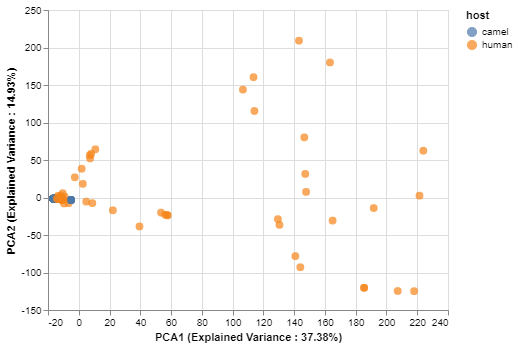

In [90]:
PCAFluBrush = scatterplot_with_tooltip_interactive(merged_pca_df,'pca1','pca2','PCA1 (Explained Variance : {}%'.format(round(explained_variance_PCA[0]*100,2)) + ")",
                                          'PCA2 (Explained Variance : {}%'.format(round(explained_variance_PCA[1]*100,2)) + ")",['strain'],'host:N')
PCAFluBrush
#PCAFluBrush.save("docs/PCA" + virus_name + "Brush.html")

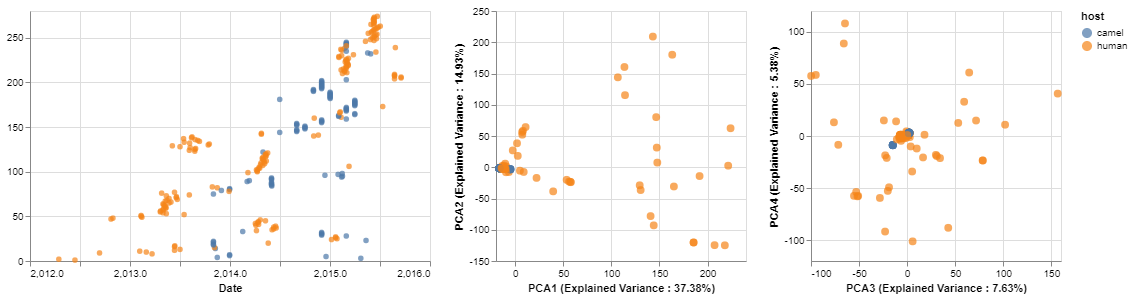

In [91]:
list_of_chart = linking_tree_with_plots_brush(merged_pca_df,['pca1','pca2','pca3','pca4', 'pca5', 'pca6'],
                                         ['PCA1 (Explained Variance : {}%'.format(round(explained_variance_PCA[0]*100,2)) + ")",
                                          'PCA2 (Explained Variance : {}%'.format(round(explained_variance_PCA[1]*100,2)) + ")",
                                          'PCA3 (Explained Variance : {}%'.format(round(explained_variance_PCA[2]*100,2)) + ")",
                                          'PCA4 (Explained Variance : {}%'.format(round(explained_variance_PCA[3]*100,2)) + ")",
                                          'PCA5 (Explained Variance : {}%'.format(round(explained_variance_PCA[4]*100,2)) + ")",
                                          'PCA6 (Explained Variance : {}%'.format(round(explained_variance_PCA[5]*100,2)) + ")"],
                                         "host:N",['strain', "host"])
chart_pca = list_of_chart[0]|list_of_chart[1]|list_of_chart[2]

chart_pca

In [93]:
MDS_df = pd.read_csv("../mers-nextstrain/results/embed_mds.csv",index_col=0)
merged_mds_df = MDS_df.merge(node_data, on="strain")

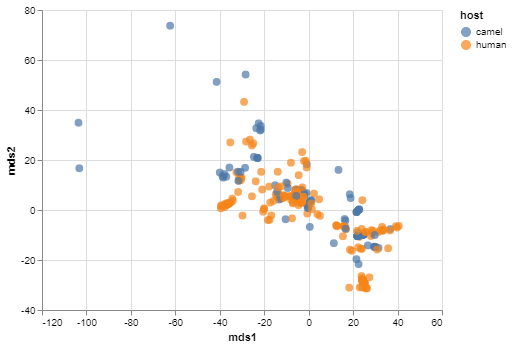

In [94]:
scatterplot_with_tooltip_interactive(merged_mds_df,'mds1','mds2',"mds1","mds2",['strain'],'host:N')

In [95]:
list_of_chart = linking_tree_with_plots_brush(merged_mds_df,['mds1','mds2'],["MDS1", "MDS2"], 'host:N', ['strain'])
chart_mds = list_of_chart[0]|list_of_chart[1]
#chart.save("../docs/MDSMERSBrush.html")

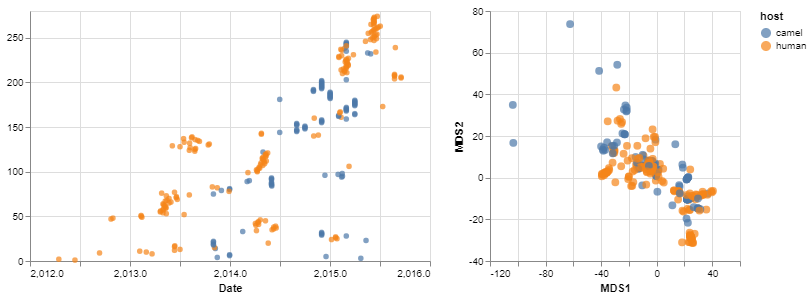

In [96]:
chart_mds

In [97]:
TSNE_df = pd.read_csv("../mers-nextstrain/results/embed_t-sne.csv",index_col=0)
merged_tsne_df = TSNE_df.merge(node_data, on="strain")

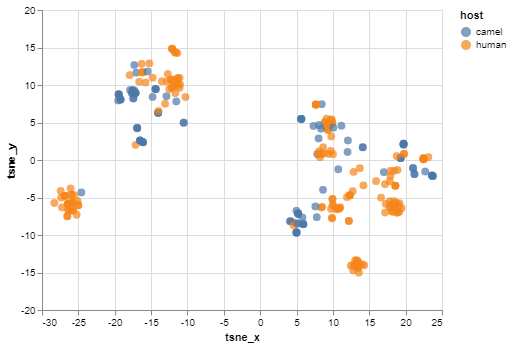

In [98]:
scatterplot_with_tooltip_interactive(merged_tsne_df,'tsne_x','tsne_y','tsne_x','tsne_y',['strain'],'host:N')

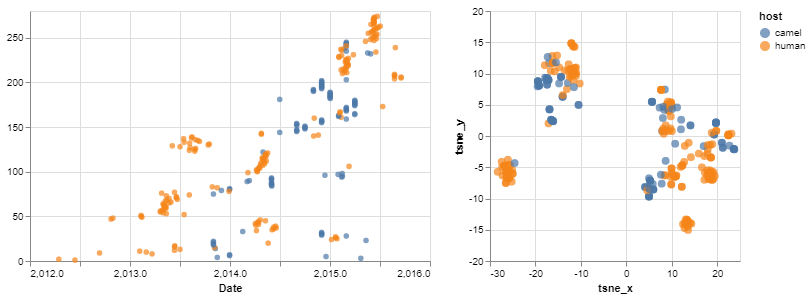

In [99]:
list_of_chart = linking_tree_with_plots_brush(
    merged_tsne_df,
    ['tsne_x','tsne_y'],
    ['tsne_x','tsne_y'],
    'host:N',
    ["host:N","strain:N"]
)
chart_tsne = list_of_chart[0]|list_of_chart[1]
chart_tsne
#chart.save("../docs/TSNEMERSBrush.html")

In [100]:
UMAP_df = pd.read_csv("../mers-nextstrain/results/embed_umap.csv",index_col=0)
merged_umap_df = UMAP_df.merge(node_data, on="strain")

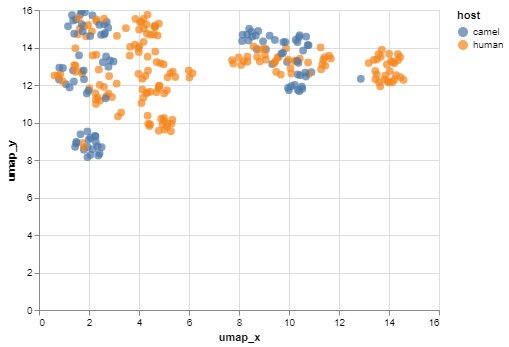

In [101]:
scatterplot_with_tooltip_interactive(merged_umap_df,'umap_x','umap_y','umap_x','umap_y',['strain'],'host:N')

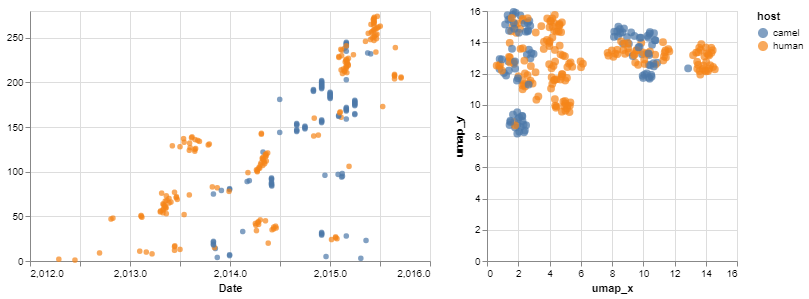

In [102]:
list_of_data_and_titles = ['umap_x','umap_y']
list_of_chart = linking_tree_with_plots_brush(
    merged_umap_df,
    list_of_data_and_titles,
    list_of_data_and_titles,
    'host:N',
    ["host","strain:N"]
)
chart_umap = list_of_chart[0]|list_of_chart[1]
chart_umap
#chart.save("../docs/UMAPMERSBrush.html")

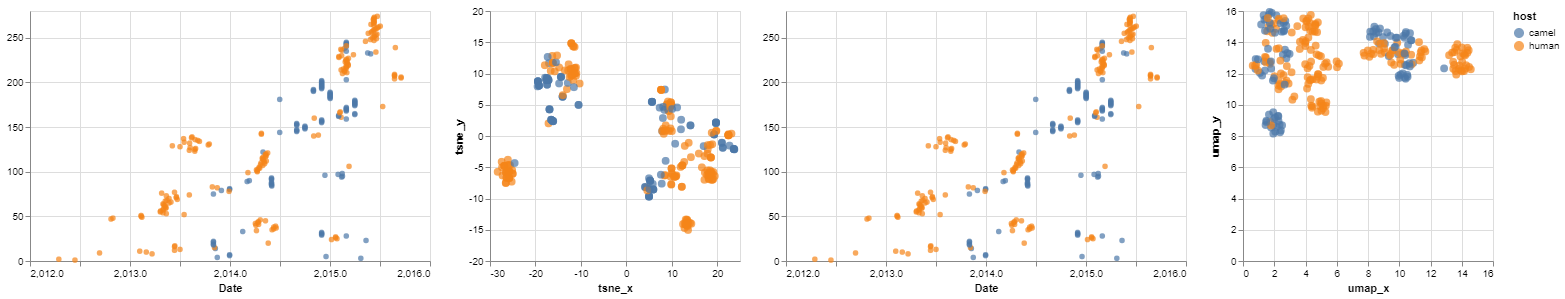

In [103]:
chart_tsne|chart_umap

In [128]:
merged_df = node_data.merge(
    principalDf,
    on="strain"
).merge(
    MDS_df,
    on="strain"
).merge(
    TSNE_df,
    on="strain"
).merge(
    UMAP_df,
    on="strain"
)

In [129]:
merged_df

,strain,y,accession,host,date,original_strain,pca1,pca2,pca3,pca4,...,mds8,mds9,mds10,mds_label,tsne_x,tsne_y,t-sne_label,umap_x,umap_y,umap_label
0,EMC/2012|JX869059|human|2012-06-13,1,JX869059,human,2012.449454,EMC/2012,-16.477034,-1.561241,2.361709,2.863369,...,70.462546,-29.826682,-19.313774,-1,13.712053,-1.083928,0,2.143025,13.575953,3
1,Jordan-N3/2012|KC776174|human|2012-04-15,2,KC776174,human,2012.288251,Jordan-N3/2012,-14.304550,-1.516343,0.093434,0.959356,...,84.375196,-24.706994,-36.025067,-1,12.851152,-1.585747,0,2.292480,13.614931,3
2,D998/15|KX108943|camel|2015-04-23,3,KX108943,camel,2015.308219,D998/15,-15.685757,-1.230432,1.938769,2.021435,...,103.645391,-17.685677,-60.193464,-1,10.735479,-1.239619,0,2.981377,13.254643,3
3,NRCE-HKU205|KJ477102|camel|2013-11-15,4,KJ477102,camel,2013.872603,NRCE-HKU205,-12.437117,-1.687963,-4.453858,0.151628,...,64.156145,39.170039,-77.420703,-1,12.014659,1.071964,0,2.683127,13.522470,3
4,Egypt_NRCE-NC163/2014|KU740200|camel|2014-12-17,5,KU740200,camel,2014.960274,Egypt_NRCE-NC163/2014,-11.497027,-2.535955,-3.821605,-0.834095,...,92.460931,46.491751,-32.791284,-1,12.060254,2.602644,0,2.777635,12.972502,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,KOR/CNUH_SNU/024_06_2015|KT868867|human|2015-0...,270,KT868867,human,2015.434247,KOR/CNUH_SNU/024_06_2015,-15.087902,-1.487794,0.708199,1.815549,...,3.552393,16.843625,4.788271,2,-26.434755,-5.817368,1,14.147308,12.155933,0
270,KOR/CNUH_SNU/030_06_2015|KT868868|human|2015-0...,271,KT868868,human,2015.434247,KOR/CNUH_SNU/030_06_2015,-15.092484,-1.502027,0.705571,1.824487,...,3.618117,16.788711,4.807953,2,-25.773876,-5.674693,1,13.819335,12.294144,0
271,KOR/CNUH_SNU/023_06_2015|KT868866|human|2015-0...,272,KT868866,human,2015.442466,KOR/CNUH_SNU/023_06_2015,-15.092484,-1.502027,0.705571,1.824487,...,3.618117,16.788711,4.807953,2,-26.434822,-5.817241,1,14.281761,12.526113,0
272,KOR/CNUH_SNU/031_06_2015|KT868869|human|2015-0...,273,KT868869,human,2015.442466,KOR/CNUH_SNU/031_06_2015,-15.086466,-1.506666,0.716452,1.826932,...,3.621124,16.794323,4.812399,2,-25.780596,-5.686324,1,13.601711,12.157019,0


In [132]:
data = linking_tree_with_plots_brush(
    merged_df,
    ['mds1', 'mds2','tsne_x','tsne_y', 'pca1', 'pca2', 'umap_x','umap_y'],
    ['MDS1', 'MDS2', 'TSNE1', 'TSNE2','PCA1 (Expected Variance : {}%'.format(round(explained_variance_PCA[0]*100,2)) + ")",
    'PCA2 (Expected Variance : {}%'.format(round(explained_variance_PCA[1]*100,2)) + ")",'UMAP1','UMAP2'],
    'host:N',
    ['strain','host']
)

In [135]:
PCAMDS = data[3]|data[1]
TSNEUMAP = data[2]|data[4]
embeddings = alt.vconcat(PCAMDS,TSNEUMAP)
embeddings
fullChart = alt.hconcat(data[0],embeddings)
fullChart
fullChart.save("../docs/FullLinkedChartClickable" + "MERS" + ".html")